In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/river/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from IPython import display
import time

In [6]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as f

spark = SparkSession.builder\
    .master('local[*]')\
    .appName('WordCloud')\
    .getOrCreate()

23/02/08 12:38:45 WARN Utils: Your hostname, river-virtual-machine resolves to a loopback address: 127.0.1.1; using 192.168.133.128 instead (on interface ens33)
23/02/08 12:38:45 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/02/08 12:38:47 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [7]:
def trata_tweets(df):
    words = df\
        .select(f.explode(f.split(f.lower('_c0'), " ")).alias('word'))\
        .withColumn('word', f.regexp_replace('word', r'http\S+', ''))\
        .withColumn('word', f.regexp_replace('word', r'@\w+', ''))\
        .withColumn('word', f.regexp_replace('word', r'rt', ''))\
        .na.replace('', None)\
        .na.drop()
    return words
        

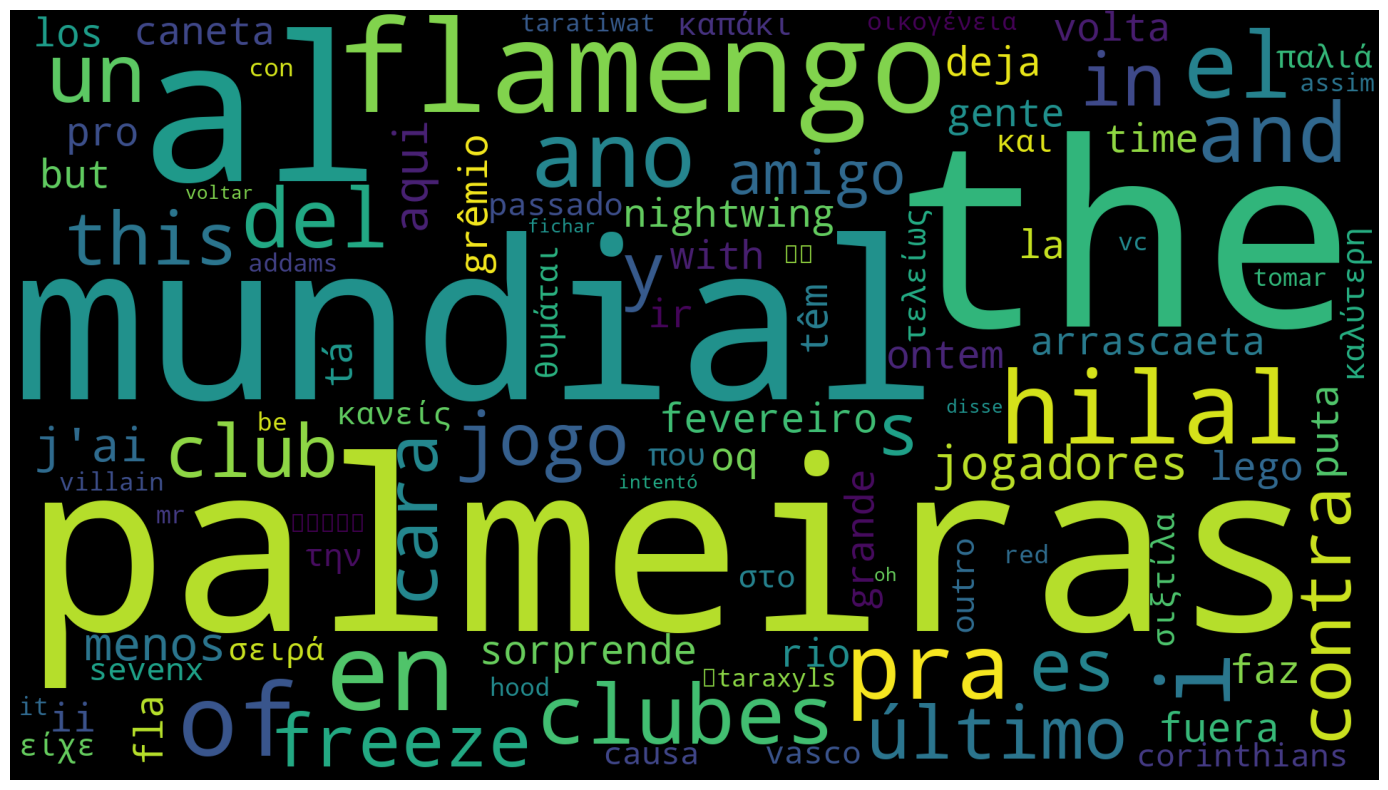

In [17]:
stops = stopwords.words('portuguese')
stops.append('batman')
plt.figure(figsize=(20,10))

while True:
    try:
        words = spark.read.csv('./csv', encoding='utf-8')
        words = trata_tweets(words)
        rows = words.collect()
        all_words = ''
        for row in rows:
            all_words = all_words + ' ' + row['word']

        wordcloud = WordCloud(stopwords=stops,
                                background_color='black',
                                width=1920,
                                height=1080,
                                max_words=100).generate(all_words)
        
        plt.cla()
        plt.axis('off')
        plt.imshow(wordcloud)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(5)
    except KeyboardInterrupt:
        break